In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

### Read in the Data

In [2]:
churn = pd.read_csv('data/churn.csv')
churn_train = pd.read_csv('data/churn_train.csv')
churn_test = pd.read_csv('data/churn_test.csv')
churn_train.head(20)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


### Look at NaN values

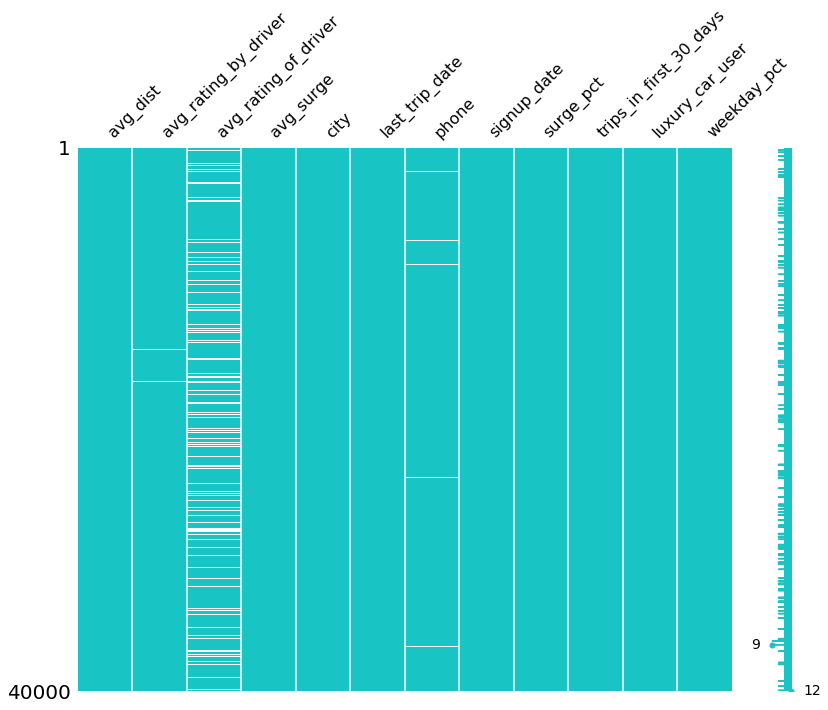

In [3]:
msno.matrix(churn_train, figsize=(13,10), color=(0.10, .77, .77))

In [4]:
churn_train['avg_rating_of_driver'].isnull().sum()/len(churn_train)

0.1632

In [5]:
imputer = SimpleImputer()
# churn_train = pd.DataFrame(imputer.fit_transform(churn_train))

In [6]:
#Convert last_trip_date and signup_date to datetime object
churn['last_trip_date'] = pd.to_datetime(churn['last_trip_date'])
churn_train['signup_date'] = pd.to_datetime(churn_train['signup_date'])
churn_test['signup_date'] = pd.to_datetime(churn_test['signup_date'])

In [7]:
#Convert last_trip_date column to int
churn_train['last_trip_date'] = churn_train['last_trip_date'] >= '2014-06-01'
churn_train['last_trip_date'] = churn_train['last_trip_date'].astype(int)
churn_train['luxury_car_user'] = churn_train['luxury_car_user'].astype(int)


# churn_test['last_trip_date'] = churn_test['last_trip_date'] >= '2014-06-01'
# churn_test['last_trip_date'] = churn_test['last_trip_date'].astype(int)

In [14]:
churn_train['last_trip_date'].unique()
churn_train.drop(columns=['signup_date'], inplace=True)

### Split dataframe

In [9]:
X_train = churn_train.drop(columns=['last_trip_date'])
y_train = churn_train['last_trip_date']
X_test = churn_test.drop(columns=['last_trip_date'])
y_test = churn_test['last_trip_date']

In [12]:
churn_train.head(20)
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null int32
phone                     39681 non-null object
signup_date               40000 non-null datetime64[ns]
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null int32
weekday_pct               40000 non-null float64
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(2)
memory usage: 3.1+ MB


In [17]:
# churn_train = pd.get_dummies(churn_train, columns=['city', 'phone'])

In [18]:
churn_train

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,0,0.0,0,0,100.0,1,0,0,1,0
1,8.06,5.0,5.0,1.00,0,0.0,2,1,0.0,1,0,0,1,0
2,21.50,4.0,NaN,1.00,0,0.0,1,1,100.0,0,0,1,0,1
3,9.46,5.0,NaN,2.75,0,100.0,1,0,100.0,0,0,1,1,0
4,13.77,5.0,NaN,1.00,0,0.0,0,0,100.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2.06,4.8,4.3,1.08,0,9.5,8,0,90.5,0,0,1,1,0
39996,2.05,5.0,5.0,1.00,0,0.0,2,0,85.7,0,1,0,0,1
39997,3.04,5.0,5.0,1.00,1,0.0,3,1,33.3,0,0,1,1,0
39998,3.49,4.3,3.3,1.50,0,40.0,5,0,60.0,1,0,0,0,1
